In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 14748, done.
remote: Total 14748 (delta 0), reused 0 (delta 0), pack-reused 14748
Receiving objects: 100% (14748/14748), 13.26 MiB | 23.82 MiB/s, done.
Resolving deltas: 100% (10029/10029), done.


In [4]:
%cd darknet

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

/content/darknet
Building. . . It might take 2-3 minutes


In [5]:
!mkdir mask_no_mask_dataset

In [6]:
!wget "https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1" -O mask_no_mask_dataset/mask_no_mask_dataset.zip
!unzip mask_no_mask_dataset/mask_no_mask_dataset.zip -d mask_no_mask_dataset/
!rm mask_no_mask_dataset/mask_no_mask_dataset.zip

--2021-04-06 19:04:19--  https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip [following]
--2021-04-06 19:04:19--  https://www.dropbox.com/s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8a64bb57ce82074ed68b9e9e6.dl.dropboxusercontent.com/cd/0/get/BMHWjKAR2luA1TOr4GApj-1V1yUKd2tdZdenpMIpw3fkBOjoxWS2nAG1qepwngo4UEqvt6PNEgx6lZmvZDNmgx4eTykadkq_5K6MTFa_lrBjmUi22jxPDyirgtbiB1EoDfusR9mprHmCU91twPyQ6S0O/file?dl=1# [following]
--2021-04-06 19:04:20--  https://ucb8a64bb57ce82074ed68b9e9e6.dl.dropboxusercontent.com/cd/0/get/BMHWjKAR2luA1TOr4GApj-1V1yUKd2tdZdenpMIpw3fkBOjoxWS2

In [7]:
import os

In [8]:
image_dir = "/content/darknet/mask_no_mask_dataset"
imagepaths = []
for file in os.listdir(image_dir):
  if file.split(".")[-1] == "jpg" or file.split(".")[-1] == "jpeg" or file.split(".")[-1] == "png":
    imagepaths.append(os.path.join(image_dir,file))

In [9]:
import random
imagepaths = random.sample(imagepaths.copy(),k = len(imagepaths))

In [10]:
len(imagepaths)

1355

In [11]:
train_size = int(0.8*len(imagepaths))
train_paths = imagepaths[:train_size]
test_paths = imagepaths[-train_size:]

with open("data_train.txt","w") as f:
  f.write("\n".join(train_paths))

with open("data_test.txt","w") as f:
  f.write("\n".join(test_paths))

In [12]:
!mkdir ../drive/MyDrive/yolov3

In [7]:
!mv /content/class.names ./
!mv /content/yolov3-mask-setup.data ./
!mv /content/yolov3-mask-train.cfg ./
!mv /content/yolov3-mask-test.cfg ./

In [14]:
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

--2021-04-06 15:04:42--  https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/18dwbfth7prbf0h/darknet53.conv.74 [following]
--2021-04-06 15:04:43--  https://www.dropbox.com/s/dl/18dwbfth7prbf0h/darknet53.conv.74
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc347139b93a8d1c9e563d4f0ed6.dl.dropboxusercontent.com/cd/0/get/BMHlGKN_h-Yr6rjdj5T7LTw8vo8fZxF2dq0yXpA6bu0aFBAXzf_xbvQdo0Z57wogJg82kgfdF9pMP76J1ukPefoFL28w1EMNTlED9iXpLCBDVqxDUI5jTDQbwyFlPNUJkYWUQzuscNxAWsryKQZnTFWx/file?dl=1# [following]
--2021-04-06 15:04:43--  https://uc347139b93a8d1c9e563d4f0ed6.dl.dropboxusercontent.com/cd/0/get/BMHlGKN_h-Yr6rjdj5T7LTw8vo8fZxF2dq0yXpA6bu0aFBAXzf_xbvQdo0Z57wogJg82kg

In [ ]:
!./darknet detector train yolov3-mask-setup.data yolov3-mask-train.cfg darknet53.conv.74 -dont_show -map 2> train_log.txt

 Prepare additional network for mAP calculation...
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
yolov3-mask-train
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 

 seen 64, trained: 0 K-images (0 Kilo-batches_64) 
Learning Rate: 0.001, Momentum: 0.9, Decay: 0.0005
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 0.04 MB 
 CUDA allocate done! 
Loaded: 0.000052 seconds

 (next mAP calculation at 400 iterations) 
 1: 7258.288086, 7258.288086 avg loss, 0.000000 rate, 27.789557 seconds, 64 images, -1.000000 hours left
Loaded: 0.000107 seconds

 (next mAP calculation at 400 iterations) 
 2: 7252.678223, 7257.727051 avg loss, 0.000000 rate, 28.778159 seconds, 128 images, 30.869648 hours left
Loaded: 0.000079 seconds

 (next mAP calculatio

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

In [9]:
!wget "https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1" -O test-image1.jpg


--2021-04-06 19:04:41--  https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/fxei8rit9v2n83s/test-image1.jpg [following]
--2021-04-06 19:04:41--  https://www.dropbox.com/s/dl/fxei8rit9v2n83s/test-image1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc08b6686c9d6adc8e864a9986d0.dl.dropboxusercontent.com/cd/0/get/BMEa6Z8PQeXaTJgBmJn8CHW9FTOPyl80q7gsNlSYPWbMSKaDhDmQb6uvVGklR68PKi0qPMXBpKTTxtuoAzB2CWv_pHt2cf9sEQv8G1Qj3Oh2lrBQE9mRCxt8hev3Mf08uidiawa9n4z-HGWxWo9yYV8Z/file?dl=1# [following]
--2021-04-06 19:04:41--  https://uc08b6686c9d6adc8e864a9986d0.dl.dropboxusercontent.com/cd/0/get/BMEa6Z8PQeXaTJgBmJn8CHW9FTOPyl80q7gsNlSYPWbMSKaDhDmQb6uvVGklR68PKi0qPMXBpKTTxtu

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 44 K-images (0 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image1.jpg: Predicted in 45.429000 milli-seconds.
Mask: 93%


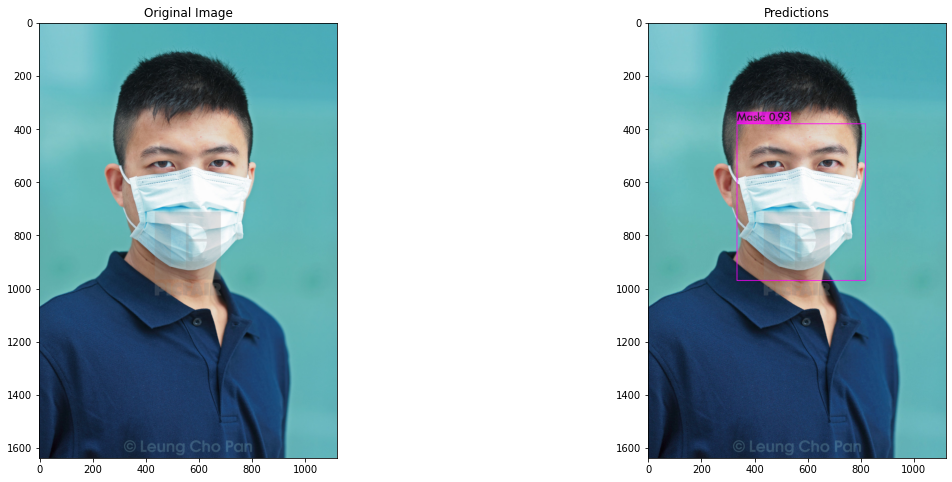

True

In [10]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg /content/drive/MyDrive/yolov3/yolov3-mask-train_last.weights test-image1.jpg -thresh .6 2> /dev/null
display_output("test-image1.jpg")
output = cv2.imread("predictions.jpg")
cv2.imwrite("/content/drive/MyDrive/yolov3/output1.jpg",output)

In [11]:
!wget "https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1" -O test-image2.jpg


--2021-04-06 19:05:18--  https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ia1fijzr69ytpp1/test-image2.jpg [following]
--2021-04-06 19:05:18--  https://www.dropbox.com/s/dl/ia1fijzr69ytpp1/test-image2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e5c2bbbc8bf31d57e24b9dc02.dl.dropboxusercontent.com/cd/0/get/BMGj85Gt96pvHBlrFnjNR-Fzr1pR3viPXANAyKRMbWRvNnGfnYPWku8wkj2oZkT53yGU0lBPYm9oNkGpBF8RposWdWywoIePY_r0MRgPl5KdqtzxAirkN71pXwfLuG5vC95W_gVo2GvT3ylIjlLxoy8l/file?dl=1# [following]
--2021-04-06 19:05:18--  https://uc8e5c2bbbc8bf31d57e24b9dc02.dl.dropboxusercontent.com/cd/0/get/BMGj85Gt96pvHBlrFnjNR-Fzr1pR3viPXANAyKRMbWRvNnGfnYPWku8wkj2oZkT53yGU0lBPYm9oNkG

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 44 K-images (0 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image2.jpg: Predicted in 45.393000 milli-seconds.
Mask: 91%
No_mask: 82%
No_mask: 99%
No_mask: 67%


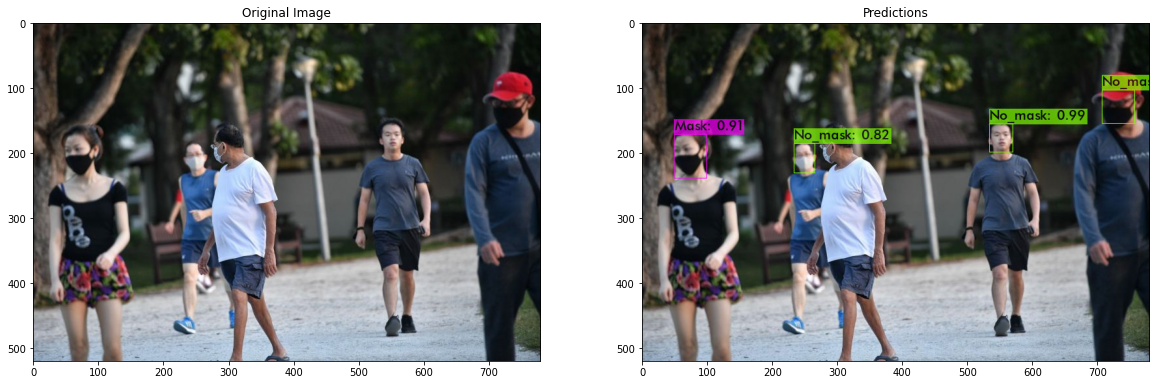

True

In [12]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg /content/drive/MyDrive/yolov3/yolov3-mask-train_last.weights test-image2.jpg -thresh .6 2> /dev/null
display_output("test-image2.jpg")
output = cv2.imread("predictions.jpg")
cv2.imwrite("/content/drive/MyDrive/yolov3/output2.jpg",output)

In [13]:
!wget "https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1" -O test-image3.jpg

--2021-04-06 19:05:41--  https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/g905k4r1git5kbx/test-image3.jpg [following]
--2021-04-06 19:05:42--  https://www.dropbox.com/s/dl/g905k4r1git5kbx/test-image3.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc67a592e84216c1470c9589ed1f.dl.dropboxusercontent.com/cd/0/get/BMFKMgdWcZiP5C4HNl198eBVO8sIDTlbH2kBwMr8ko_h_mVN9PGKKz94Rlac843H_JdLpVUYp8K4W2c2boYqnmVWEgr5K5IZBEyZkfeqr5-DxUwLKeQQzwLAsmA9OqqQJ2HR_hZ-YvCD26Pq8__91E28/file?dl=1# [following]
--2021-04-06 19:05:42--  https://uc67a592e84216c1470c9589ed1f.dl.dropboxusercontent.com/cd/0/get/BMFKMgdWcZiP5C4HNl198eBVO8sIDTlbH2kBwMr8ko_h_mVN9PGKKz94Rlac843H_JdLpVUYp8K4W2c

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 44 K-images (0 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image3.jpg: Predicted in 45.464000 milli-seconds.
Mask: 98%
Mask: 98%
No_mask: 96%
Mask: 99%
Mask: 96%
Mask: 98%
Mask: 75%
Mask: 94%
Mask: 96%
Mask: 98%
Mask: 93%
Mask: 88%
Mask: 100%
Mask: 92%
Mask: 96%
Mask: 97%
Mask: 84%
Mask: 99%
Mask: 99%
Mask: 83%


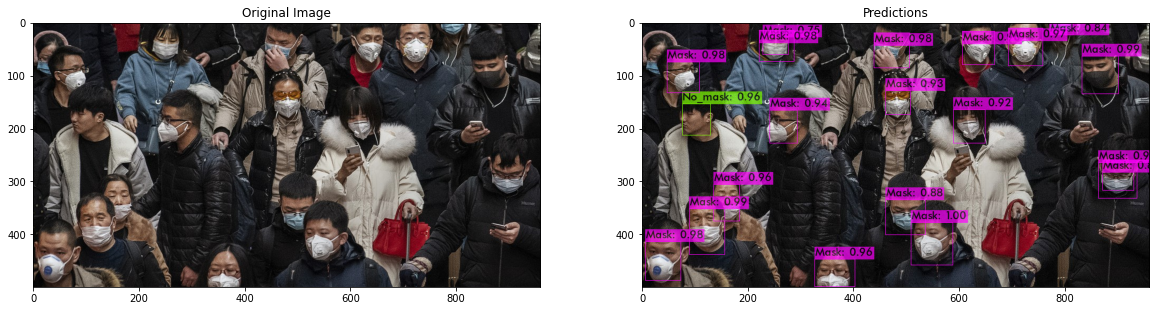

True

In [14]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg ../drive/MyDrive/yolov3/yolov3-mask-train_last.weights test-image3.jpg -thresh .6 2> /dev/null
display_output("test-image3.jpg")
output = cv2.imread("predictions.jpg")
cv2.imwrite("/content/drive/MyDrive/yolov3/output3.jpg",output)

In [15]:
!wget "https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1" -O test-image4.jpg


--2021-04-06 19:06:04--  https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/90ggmiur7b8g35m/test-image4.jpg [following]
--2021-04-06 19:06:04--  https://www.dropbox.com/s/dl/90ggmiur7b8g35m/test-image4.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7653786f3b6a968f5d5319af27.dl.dropboxusercontent.com/cd/0/get/BME3H8kunJtsi_Qy8elkenzWhHsk7oQybGv_91HN5aIY4yPt1SiXbPI4xV2ST55chq0Z4LPaduKtiTl8YPpxDyqNlObMGUA5O3xzUe01QnOpibHX3S0jCE9djAsXflOn64az6Y1yc1NkY8ZX6t72EH5u/file?dl=1# [following]
--2021-04-06 19:06:05--  https://uc7653786f3b6a968f5d5319af27.dl.dropboxusercontent.com/cd/0/get/BME3H8kunJtsi_Qy8elkenzWhHsk7oQybGv_91HN5aIY4yPt1SiXbPI4xV2ST55chq0Z4LPaduKtiTl

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 44 K-images (0 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image4.jpg: Predicted in 45.453000 milli-seconds.
No_mask: 77%
No_mask: 63%
Mask: 90%
Mask: 70%
No_mask: 65%
No_mask: 64%
Mask: 96%
Mask: 94%


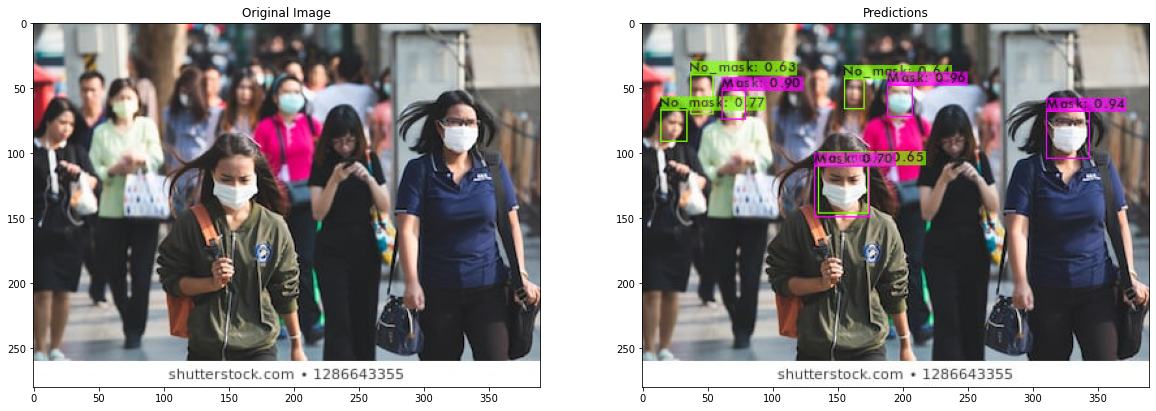

True

In [16]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg /content/drive/MyDrive/yolov3/yolov3-mask-train_last.weights test-image4.jpg -thresh .6 2> /dev/null
display_output("test-image4.jpg")
output = cv2.imread("predictions.jpg")
cv2.imwrite("/content/drive/MyDrive/yolov3/output4.jpg",output)

In [17]:
!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O test-video1.mp4

--2021-04-06 19:06:34--  https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/pds0w3z5y7w89oz/test-video1.mp4 [following]
--2021-04-06 19:06:34--  https://www.dropbox.com/s/dl/pds0w3z5y7w89oz/test-video1.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3625575a69214bad5ba7c3bc4d.dl.dropboxusercontent.com/cd/0/get/BMHplXg_AV2r6mX_34grkqoyZ8enTwz_OjbN9mpmIPBKsmpWqXFWoAGgyYa9Se91EhDPW0t_VeDlTEn0dTddDt4tEPhTKUOYh9Yl6WR-KFIIyDiUlIEuZ93aOwUzpW9z31ePdRgkjff8EjA7QEXFYjxS/file?dl=1# [following]
--2021-04-06 19:06:34--  https://uc3625575a69214bad5ba7c3bc4d.dl.dropboxusercontent.com/cd/0/get/BMHplXg_AV2r6mX_34grkqoyZ8enTwz_OjbN9mpmIPBKsmpWqXFWoAGgyYa9Se91EhDPW0t_VeDlTEn

In [18]:
!./darknet detector demo yolov3-mask-setup.data yolov3-mask-test.cfg /content/drive/MyDrive/yolov3/yolov3-mask-train_last.weights  test-video1.mp4 -thresh .6 -out_filename out-vid1.avi -dont_show

Streaming output truncated to the last 5000 lines.
No_mask: 77% 
Mask: 90% 

FPS:29.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 99% 
No_mask: 98% 
Mask: 89% 
Mask: 64% 

FPS:29.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 98% 
No_mask: 97% 
Mask: 79% 
Mask: 72% 

FPS:30.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 98% 
No_mask: 97% 
Mask: 79% 
Mask: 71% 

FPS:31.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 98% 
No_mask: 96% 
Mask: 74% 

FPS:31.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 99% 
No_mask: 89% 
Mask: 87% 
Mask: 79% 

FPS:31.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 98% 
No_mask: 75% 
Mask: 92% 
Mask: 80% 

FPS:30.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 93% 
Mask: 92% 
Mask: 88% 
Mask: 86% 

FPS:30.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No_mask: 99% 
No_mask: 84% 
Mask: 96% 
Mask: 92% 
Mask: 90% 
Mask: 67% 

FPS:29.9 	 AVG_FP

In [19]:
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O test-video2.mp4

--2021-04-06 19:06:56--  https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/sqwu0ktdtlxtdsd/test-video2.mp4 [following]
--2021-04-06 19:06:57--  https://www.dropbox.com/s/dl/sqwu0ktdtlxtdsd/test-video2.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc90b76181fcf913d29c973d583b.dl.dropboxusercontent.com/cd/0/get/BMFgFKZ7nJ5IU6e8Ig-tqXaqGwax8G5zeabiDzSGEZ4UZLFDXRom7OLEkmIBMwCmRTMXZDN9IX9NTw96AmPUetjmVTHPHz8cp6l2na4vJWn8PtQAkNsTaCUhZg3GBm5xMKwj4lsoklLxw4-yi0WOX876/file?dl=1# [following]
--2021-04-06 19:06:58--  https://uc90b76181fcf913d29c973d583b.dl.dropboxusercontent.com/cd/0/get/BMFgFKZ7nJ5IU6e8Ig-tqXaqGwax8G5zeabiDzSGEZ4UZLFDXRom7OLEkmIBMwCmRTMXZDN9IX9NT

In [20]:
!./darknet detector demo yolov3-mask-setup.data yolov3-mask-test.cfg /content/drive/MyDrive/yolov3/yolov3-mask-train_last.weights  test-video2.mp4 -thresh .6 -out_filename out-vid2.avi -dont_show

Streaming output truncated to the last 5000 lines.

FPS:30.6 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 86% 
No_mask: 86% 

FPS:30.1 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 88% 
No_mask: 86% 
No_mask: 84% 
No_mask: 79% 

FPS:30.9 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 85% 
No_mask: 75% 
No_mask: 66% 
Mask: 90% 

FPS:30.7 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 65% 
Mask: 71% 

FPS:31.1 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 67% 
Mask: 70% 

FPS:30.6 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 83% 
No_mask: 80% 
Mask: 70% 

FPS:31.5 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 74% 
Mask: 75% 

FPS:32.1 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 69% 
Mask: 93% 

FPS:32.6 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

No_mask: 78% 
Mask: 98% 

FPS:32.9 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

Mask: 98% 

FPS:33.3 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

Mask: 99% 

FPS:33.6 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

Mask: 97% 

FP

In [21]:
from google.colab import files
files.download("out-vid1.avi")
files.download("out-vid2.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>